# Multiclase Logistic Regression 
<!-- ver [1](https://towardsdatascience.com/multivariate-logistic-regression-in-python-7c6255a286ec) y [2](https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python) -->

ver [1](https://towardsdatascience.com/multiclass-logistic-regression-from-scratch-9cc0007da372#:~:text=Multiclass%20logistic%20regression%20is%20also,really%20know%20how%20it%20works.), [2](https://www.kaggle.com/satishgunjal/multiclass-logistic-regression-using-sklearn), [3](https://scikit-learn.org/stable/modules/multiclass.html)

Clases desbalanceadas [4](https://github.com/jbagnato/machine-learning/blob/master/Ejercicio_imbalanced_data.ipynb)

## Clasificación multiclase

Se asume que cada instancia (fila de la tabla de datos) se asigna a una una etiqueta. Por ejemplo, en nuestro caso, la lectura de los sensores del robot en un tiempo de muestreo solo puede ser asignada a un movimiento particular, e.g. hacia adelante, a la izquierda, derecha o atrás, aqui en este ejemplo hay 4 etiquetas.

Todos los clasificadores en Scikit-learn estan abilitados por defecto para manejar este tipo de clasificación.

### Formato target [5](https://scikit-learn.org/stable/modules/preprocessing_targets.html#preprocessing-targets)

Se pueden usar dos tipos de codificación para la columnad de clases

1. Un vector columna que contiene más de dos valores discretos (clases). *Se usa este tipo en el ejercicio*
2. **Matriz de forma binaria densa o dispersa** (Dense or sparse binary matrix of shape), una matriz con número de filas igual a los ejemplos (o instancias) y número de columnas igual al número de clases. En esta matriz se incuentra un 1 en la columna correspondiente a la clase a la que pertenece la instancia.


### OneVsRestClassifier - one-vs-all

Se ajusta un clasificador por cada clase.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics


In [3]:
# Cargar datos
df = pd.read_csv("Data/robot_wall_follower/sensor_readings_4.csv", header=None,
                 names=["sd_front", "sd_left", "sd_right", "sd_back", "target"])


In [4]:
df.head()

,sd_front,sd_left,sd_right,sd_back,target
0,1.687,0.445,2.332,0.429,Slight-Right-Turn
1,1.687,0.449,2.332,0.429,Slight-Right-Turn
2,1.687,0.449,2.334,0.429,Slight-Right-Turn
3,1.687,0.449,2.334,0.429,Slight-Right-Turn
4,1.687,0.449,2.334,0.429,Slight-Right-Turn


In [5]:
X = df.loc[:, df.columns != 'target']  # array numpy
y = df.target  # serie


In [6]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=1)


In [28]:
X_test.head()

,sd_front,sd_left,sd_right,sd_back
447,1.496,0.485,1.873,1.090
5249,2.846,0.634,1.637,0.864
3079,0.593,0.778,2.898,1.890
5187,0.840,0.468,1.495,1.427
2361,0.780,0.723,1.528,0.746


In [52]:
lm = linear_model.LogisticRegression(multi_class='ovr', solver='liblinear',class_weight="balanced")
# warm_start=True - inicia desde el anterior modelo
# class_weight="balanced"
lm.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', multi_class='ovr',
                   solver='liblinear')

In [46]:
X_test.loc[5249,:]

sd_front    2.846
sd_left     0.634
sd_right    1.637
sd_back     0.864
Name: 5249, dtype: float64

## Evaluación del modelo

Solo usamos el conjunto test

In [47]:
y_test[5249]

'Move-Forward'

In [53]:
print('Predicted value is =', lm.predict([X_test.loc[447, :]]))

print('Actual value from test data is %s' %
       (y_test[447]))


Predicted value is = ['Slight-Right-Turn']
Actual value from test data is Slight-Right-Turn


## Puntuación del modelo

In [54]:
lm.score(X_test, y_test)


0.9194139194139194

## Matriz de confusión

* La matriz de confusión ayuda a visualizar el rendimiento del modelo.
* Los elementos diagonales representan el número de puntos para los cuales la etiqueta predicha es igual a la etiqueta verdadera
* Los elementos fuera de la diagonal son aquellos que están mal etiquetados por el clasificador.
* Cuanto más altos sean los valores diagonales de la matriz de confusión, mejor, indicando muchos correctos
 
Creemos una matriz de confusión usando la biblioteca de sklearn y los datos de prueba

array([[330,  56,   4,  19],
       [  0, 443,   3,   0],
       [  0,   3,  73,   0],
       [  1,   2,   0, 158]])

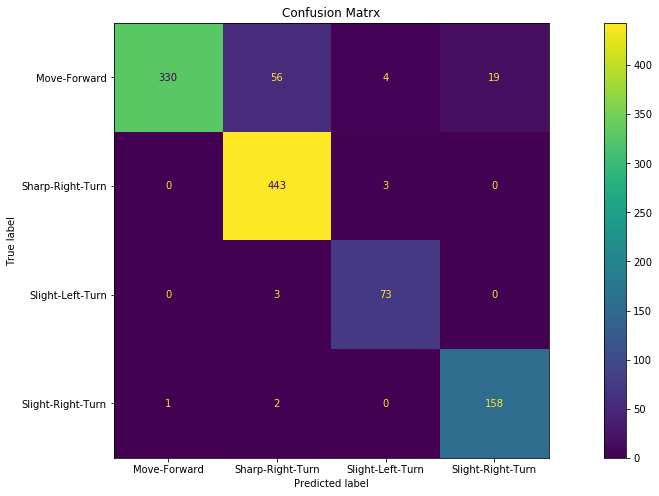

In [55]:
#Creating matplotlib axes object to assign figuresize and figure title
fig, ax = plt.subplots(figsize=(20, 8))
ax.set_title('Confusion Matrx')

disp = metrics.plot_confusion_matrix(lm, X_test, y_test,ax=ax)#, display_labels=y_test, ax=ax)
disp.confusion_matrix


## Informe de clasificación

El informe de clasificación se utiliza para medir la calidad de la predicción del algoritmo de clasificación.
 
* Precisión: indica cuántas clases están correctamente clasificadas
* Recall: indica qué proporciones de positivos reales se identificaron correctamente
* F-Score: es la media armónica entre precisión y recall
* Soporte: es el número de ocurrencias de la clase dada en nuestro conjunto de datos

> Dado que las clases son desbalanceadas la metrica que deberíamos revisar es f1, sensibilidad o precisión.

In [56]:
print(metrics.classification_report(y_test, lm.predict(X_test)))


                   precision    recall  f1-score   support

     Move-Forward       1.00      0.81      0.89       409
 Sharp-Right-Turn       0.88      0.99      0.93       446
 Slight-Left-Turn       0.91      0.96      0.94        76
Slight-Right-Turn       0.89      0.98      0.93       161

         accuracy                           0.92      1092
        macro avg       0.92      0.94      0.92      1092
     weighted avg       0.93      0.92      0.92      1092



> Al ajustar el parametro en el modelo de clases balanceadas, el modelo en el conjunto de test mejoro sustancialmente!! ver [5](https://machinelearningparatodos.com/tratamiento-de-clases-desbalanceadas/),[6](https://www.aprendemachinelearning.com/clasificacion-con-datos-desbalanceados/)

## Porhacer

1. Ver si se deben normalizar los datos
2. Ver si se debe regularizar (Por defecto aplica L2) ver [7](https://www.iartificial.net/regularizacion-lasso-l1-ridge-l2-y-elasticnet/)
3. Ajustar los parámetros usando la libreria que se puede ajustar varios modelos de una vez


## Otras alternativas (no exploradas)

### OneVsOneClasifier
Construye un clasificador por cada par de clases. La clase que recibe mas votos se selecciona. Si hay un empate se se seleeciona la de mayor confidencia.

ESte es mas lento que el OneVsRest

### OutputCodeClassifier

Cada clase se representa com un espacio euclidiano. Y cada clase se representa con un número binario. SE genera un libro de codigo (code book) que es una matriz que localiza o codifica cada clase. Al entrenar un clasificador binario por bit en el code book se ajusta. Cuando se predice, el clasificador se usa para proyectar nuevos puntos en el espacio de la clase y la clase mas cercana al punto es la escojida.



### Multilabel Clasification

Permite clasificar en una base de datos donde una instancia puede pertencer a una clase, varias o todas, se conoce como multilabel. No aplica para nuestro ejemplo.